## Wildfire Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
df = pd.read_csv('10.17\WFIGS_-_Current_Wildland_Fire_Locations.csv')
# plt.plot(list(df['month']),list(df['temp']),'o',ms = 2)
df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
0,-116.199314,46.690566,238920,NaN,DEFAULT,NaN,NaN,NaN,44.0,1.0,...,0,NaN,NaN,2022/01/21 23:20:40+00,2022/10/08 01:40:08+00,IRWIN,{EBACF76A-FE60-4854-A57E-3FA83D925B23},0,NaN,NaN
1,-115.583513,46.129386,244761,NaN,DEFAULT,NaN,NaN,NaN,20.0,1.0,...,0,NaN,NaN,2022/03/14 16:26:26+00,2022/10/08 01:40:03+00,IRWIN,{EAA58725-CF14-4BC5-92DC-20B3D10CE32B},0,NaN,NaN
2,-86.068755,33.209173,250963,NaN,DEFAULT,NaN,NaN,NaN,300.0,1.0,...,0,NaN,NaN,2022/04/23 15:50:32+00,2022/10/10 21:26:08+00,IRWIN,{0A839704-3360-41AD-9DBC-83510BD33E37},0,NaN,NaN
3,-109.088311,38.310006,252566,NaN,DEFAULT,NaN,NaN,NaN,69.0,1.0,...,0,NaN,NaN,2022/05/03 20:06:28+00,2022/10/12 15:10:24+00,IRWIN,{C24FB073-AC81-44CB-811B-3B8B5F76A698},0,NaN,NaN
4,-108.059210,33.203616,254253,NaN,ICS209,325132.9497,NaN,NaN,325136.0,150.0,...,0,Type 4 Incident,2022/06/27 17:28:23+00,2022/05/14 13:11:22+00,2022/10/13 17:17:35+00,IRWIN,{2528B165-44CD-4BA6-9336-EAC5D238E1D7},0,NaN,NaN


In [4]:

writer = pd.ExcelWriter('Wildfire_Acres.xlsx', engine='xlsxwriter')
writer.close()

In [5]:
df = pd.read_excel('Wildfire_Acres.xlsx')
df

""


In [6]:
df = pd.DataFrame({'Name': ['A', 'B', 'C', 'D'],
                   'Age': [10, 0, 30, 50]})

writer = pd.ExcelWriter('demo.xlsx', engine='xlsxwriter')

df.to_excel(writer, sheet_name='Sheet1', index=False)

writer.close()

Year Fires Acres
2021 58,985 7,125,643
2020 58,950 10,122,336
2019 50,477 4,664,364
2018 58,083 8,767,492
2017 71,499 10,026,086
2016 67,743 5,509,995
2015 68,151 10,125,149
2014 63,312 3,595,613
2013 47,579 4,319,546
2012 67,774 9,326,238
2011 74,126 8,711,367
2010 71,971 3,422,724
2009 78,792 5,921,786
2008 78,979 5,292,468
2007 85,705 9,328,045
2006 96,385 9,873,745
2005 66,753 8,689,389
2004 65,461 *8,097,880
2003 63,629 3,960,842
2002 73,457 7,184,712
2001 84,079 3,570,911
2000 92,250 7,393,493
1999 92,487 5,626,093
1998 81,043 1,329,704
1997 66,196 2,856,959
1996 96,363 6,065,998
1995 82,234 1,840,546
1994 79,107 4,073,579
1993 58,810 1,797,574
1992 87,394 2,069,929
1991 75,754 2,953,578
1990 66,481 4,621,621
1989 48,949 1,827,310
1988 72,750 5,009,290
1987 71,300 2,447,296
1986 85,907 2,719,162
1985 82,591 2,896,147
1984 20,493 1,148,409
1983 18,229 1,323,666

In [7]:
import numpy as np
string = "2021 58,985 7,125,643 2020 58,950 10,122,336 2019 50,477 4,664,364 2018 58,083 8,767,492 2017 71,499 10,026,086 2016 67,743 5,509,995 2015 68,151 10,125,149 2014 63,312 3,595,613 2013 47,579 4,319,546 2012 67,774 9,326,238 2011 74,126 8,711,367 2010 71,971 3,422,724 2009 78,792 5,921,786 2008 78,979 5,292,468 2007 85,705 9,328,045 2006 96,385 9,873,745 2005 66,753 8,689,389 2004 65,461 *8,097,880 2003 63,629 3,960,842 2002 73,457 7,184,712 2001 84,079 3,570,911 2000 92,250 7,393,493 1999 92,487 5,626,093 1998 81,043 1,329,704 1997 66,196 2,856,959 1996 96,363 6,065,998 1995 82,234 1,840,546 1994 79,107 4,073,579 1993 58,810 1,797,574 1992 87,394 2,069,929 1991 75,754 2,953,578 1990 66,481 4,621,621 1989 48,949 1,827,310 1988 72,750 5,009,290 1987 71,300 2,447,296 1986 85,907 2,719,162 1985 82,591 2,896,147 1984 20,493 1,148,409 1983 18,229 1,323,666"
word = ""
lst = []
for i in string:
    if i == " ":
        lst.append(word)
        word = ""
    else:
        word += i
lst.append(word)
print(lst)
nplst = np.array(lst)

['2021', '58,985', '7,125,643', '2020', '58,950', '10,122,336', '2019', '50,477', '4,664,364', '2018', '58,083', '8,767,492', '2017', '71,499', '10,026,086', '2016', '67,743', '5,509,995', '2015', '68,151', '10,125,149', '2014', '63,312', '3,595,613', '2013', '47,579', '4,319,546', '2012', '67,774', '9,326,238', '2011', '74,126', '8,711,367', '2010', '71,971', '3,422,724', '2009', '78,792', '5,921,786', '2008', '78,979', '5,292,468', '2007', '85,705', '9,328,045', '2006', '96,385', '9,873,745', '2005', '66,753', '8,689,389', '2004', '65,461', '*8,097,880', '2003', '63,629', '3,960,842', '2002', '73,457', '7,184,712', '2001', '84,079', '3,570,911', '2000', '92,250', '7,393,493', '1999', '92,487', '5,626,093', '1998', '81,043', '1,329,704', '1997', '66,196', '2,856,959', '1996', '96,363', '6,065,998', '1995', '82,234', '1,840,546', '1994', '79,107', '4,073,579', '1993', '58,810', '1,797,574', '1992', '87,394', '2,069,929', '1991', '75,754', '2,953,578', '1990', '66,481', '4,621,621', '19

In [8]:
# df = pd.DataFrame({'Year': lst[0::3],
#                    'Fires': [int(i.replace(',',''))for i in lst[1::3]],
#                    'Acres': [int(i.replace(',',''))for i in lst[2::3]]})

# writer = pd.ExcelWriter('Wildfire_Acres.xlsx', engine='xlsxwriter')
# # 
# df.to_excel(writer, sheet_name='Sheet1', index=False)

# writer.close()

In [9]:
df = pd.read_excel('Wildfire_Acres_by_Years.xlsx')
df

,Year,Fires,Acres
0,2021,"58,985","7,125,643"
1,2020,"58,950","10,122,336"
2,2019,"50,477","4,664,364"
3,2018,"58,083","8,767,492"
4,2017,"71,499","10,026,086"
5,2016,"67,743","5,509,995"
6,2015,"68,151","10,125,149"
7,2014,"63,312","3,595,613"
8,2013,"47,579","4,319,546"
9,2012,"67,774","9,326,238"


In [10]:
#Data 
df.Year
Fires_lst = [int(i.replace(',','')) for i in df.Fires]
Acres_lst = [int(k.replace(',','').replace('*','')) for k in df.Acres]
data = []
for i,j,k in zip(df.Year,Fires_lst,Acres_lst):
    data.append([i,j,k])
df1 = pd.DataFrame(data, columns=['Year','Fires','Acres'])
df1.head()
# type(df1['Year'][0])

,Year,Fires,Acres
0,2021,58985,7125643
1,2020,58950,10122336
2,2019,50477,4664364
3,2018,58083,8767492
4,2017,71499,10026086


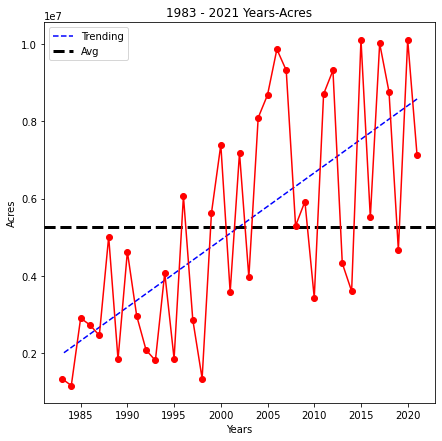

In [11]:
plt.figure(figsize=(7,7))

plt.xlabel('Years')
plt.ylabel('Acres')
# Get the trending line
trend = np.polyfit(df1.Year, df1.Acres, 1)
p = np.poly1d(trend)
plt.plot(df1.Year, p(df1.Year), '--b', label = 'Trending')
# Get the average line
plt.axhline(y=np.nanmean(df1.Acres),color='k', linestyle='--', linewidth=3, label='Avg')
plt.plot(df1.Year, df1.Acres, 'o-r' )
plt.title('1983 - 2021 Years-Acres');

plt.legend()


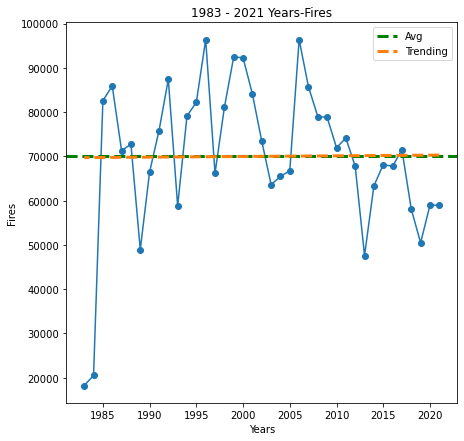

In [12]:
import numpy as np
plt.figure(figsize=(7,7))
plt.plot(df.Year,Fires_lst,'o-')
plt.title('1983 - 2021 Years-Fires')
plt.xlabel('Years')
plt.ylabel('Fires')
# Get the average line
plt.axhline(y=np.nanmean(df1.Fires),color='g', linestyle='--', linewidth=3, label='Avg')
# Get the trending line
trend = np.polyfit(df1.Year, df1.Fires, 1)
p = np.poly1d(trend)
plt.plot(df1.Year, p(df1.Year),'--',label = 'Trending',linewidth=3)
plt.legend()
plt.show();

## Map

In [13]:
df = pd.read_csv('10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')
df.tail()

C:\Users\victo\AppData\Local\Temp\ipykernel_22808\3299519847.py:1: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')


,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
35488,-102.049472,43.206223,285181,NaN,DEFAULT,NaN,NaN,NaN,0.20,0.20,...,0,NaN,NaN,2022/10/11 15:45:28+00,2022/10/11 15:45:31+00,IRWIN,{9B92F772-26DC-4AE2-9A15-EF9F10EAE29D},0.0,NaN,NaN
35489,-84.463004,34.854007,285182,NaN,DEFAULT,NaN,NaN,NaN,0.84,0.84,...,0,NaN,NaN,2022/10/11 15:46:42+00,2022/10/11 15:46:42+00,IRWIN,{35935F02-06BC-469E-A115-EDC5DD932080},0.0,NaN,NaN
35490,-99.447232,44.060563,285183,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2022/10/11 15:48:55+00,2022/10/11 15:48:55+00,IRWIN,{7B754632-5718-4BAF-8BBB-A467522EC147},0.0,NaN,NaN
35491,-97.297488,34.875846,285185,NaN,DEFAULT,NaN,NaN,NaN,0.10,0.10,...,0,NaN,NaN,2022/10/11 16:14:53+00,2022/10/11 16:16:47+00,IRWIN,{12C9A3F2-8EBA-4A8E-8411-DB5ADEE32D6B},0.0,NaN,NaN
35492,-112.463412,39.286656,285186,NaN,DEFAULT,NaN,2022/10/08 00:30:00+00,2022/10/08 00:30:00+00,0.10,0.10,...,0,NaN,NaN,2022/10/11 16:21:38+00,2022/10/11 16:21:40+00,IRWIN,{DBD89218-FB44-4E88-86F5-F787E7109BF1},0.0,NaN,NaN


In [14]:
df[['X','Y','ModifiedOnDateTime_dt']]

,X,Y,ModifiedOnDateTime_dt
0,-84.650604,34.927207,2022/04/29 17:58:06+00
1,-117.226312,33.942359,2022/01/01 11:13:42+00
2,-120.634672,35.164286,2022/06/24 01:26:38+00
3,-92.951906,31.021216,2022/01/19 22:56:16+00
4,-92.916406,30.983416,2022/01/10 16:10:56+00
...,...,...,...
35488,-102.049472,43.206223,2022/10/11 15:45:31+00
35489,-84.463004,34.854007,2022/10/11 15:46:42+00
35490,-99.447232,44.060563,2022/10/11 15:48:55+00
35491,-97.297488,34.875846,2022/10/11 16:16:47+00


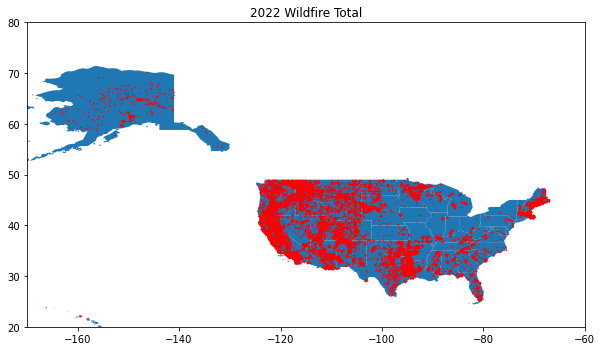

In [15]:
from operator import ge
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

states = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = GeoDataFrame(df, geometry=geometry)   

states = states.to_crs("EPSG:4326")
a = gdf.plot(ax=states.plot(figsize=(10, 10)),marker='o', color='red', markersize=0.1)
a.set_title('2022 Wildfire Total')
a.set_xlim(-170, -60)
a.set_ylim(20, 80);


(20.0, 80.0)

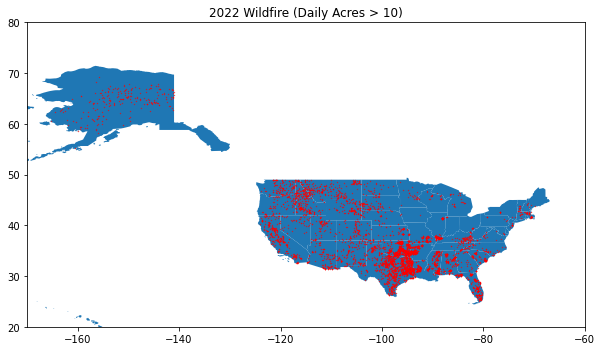

In [16]:
states = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

geometry = [Point(xy) for xy in zip(df[df['DailyAcres']>10]['X'], df[df['DailyAcres']>10]['Y'])]
gdf = GeoDataFrame(df[df['DailyAcres']>10]['DailyAcres'], geometry=geometry)   

states = states.to_crs("EPSG:4326")
a = gdf.plot(ax=states.plot(figsize=(10, 10)),marker='o', color='red', markersize=0.1)
a.set_title('2022 Wildfire (Daily Acres > 10)')
a.set_xlim(-170, -60)
a.set_ylim(20, 80)


(20.0, 80.0)

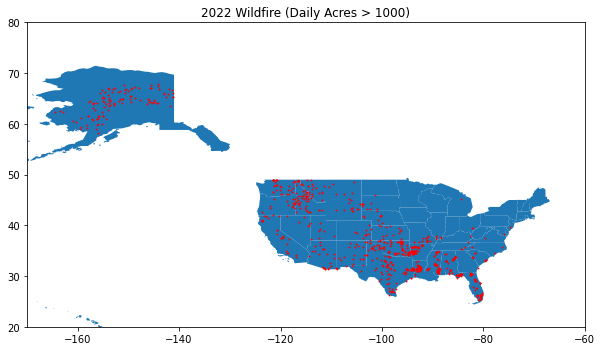

In [17]:
geometry = [Point(xy) for xy in zip(df[df['DailyAcres']>1000]['X'], df[df['DailyAcres']>1000]['Y'])]
gdf = GeoDataFrame(df[df['DailyAcres']>1000]['DailyAcres'], geometry=geometry)   

states = states.to_crs("EPSG:4326")
a = gdf.plot(ax=states.plot(figsize=(10, 10)),marker='o', color='red', markersize=0.7)
a.set_title('2022 Wildfire (Daily Acres > 1000)')
a.set_xlim(-170, -60)
a.set_ylim(20, 80)

(20.0, 80.0)

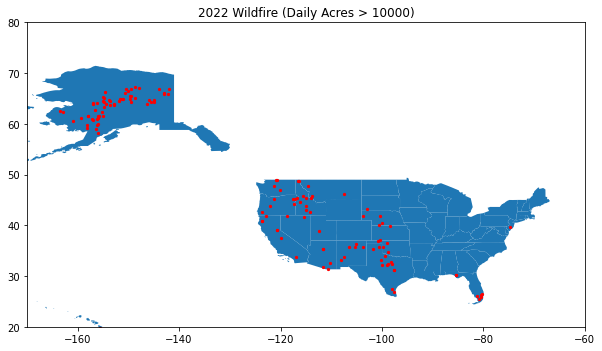

In [18]:
geometry = [Point(xy) for xy in zip(df[df['DailyAcres']>10000]['X'], df[df['DailyAcres']>10000]['Y'])]
gdf = GeoDataFrame(df[df['DailyAcres']>10000]['DailyAcres'], geometry=geometry)   

states = states.to_crs("EPSG:4326")
a = gdf.plot(ax=states.plot(figsize=(10, 10)),marker='o', color='red', markersize=5)
a.set_title('2022 Wildfire (Daily Acres > 10000)')
a.set_xlim(-170, -60)
a.set_ylim(20, 80)

## Animated Data

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')
df.tail()
df1 = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv').head()
df.head()




C:\Users\victo\AppData\Local\Temp\ipykernel_22676\2686706529.py:2: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')
C:\Users\victo\AppData\Local\Temp\ipykernel_22676\2686706529.py:4: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv').head()


,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
0,-84.650604,34.927207,231920,NaN,DEFAULT,NaN,NaN,NaN,1.00,1.00,...,0,NaN,NaN,2021/11/01 12:58:02+00,2022/04/29 17:58:06+00,IRWIN,{2BC9C8B0-BFB1-41B0-B60B-E5D16A8D7471},0.0,NaN,NaN
1,-117.226312,33.942359,236862,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 11:13:42+00,2022/01/01 11:13:42+00,IRWIN,{5E03F67E-7D71-4534-AE65-0507FC23C660},NaN,NaN,NaN
2,-120.634672,35.164286,236877,NaN,DEFAULT,NaN,2022/01/01 16:18:27+00,2022/01/01 18:45:00+00,0.01,0.01,...,0,NaN,NaN,2022/01/01 15:21:58+00,2022/06/24 01:26:38+00,IRWIN,{391610DE-D34B-49A4-A57C-8DAFD6D8BBC7},0.0,NaN,NaN
3,-92.951906,31.021216,236905,NaN,CERTIFIED,NaN,2022/01/01 19:01:00+00,2022/01/10 14:45:00+00,196.00,1.00,...,0,NaN,NaN,2022/01/01 16:50:50+00,2022/01/19 22:56:16+00,IRWIN,{C904AA58-16C8-4DB7-8911-D83A7F57C1AF},0.0,NaN,NaN
4,-92.916406,30.983416,236933,NaN,FIREREPORTING,NaN,2022/01/01 21:17:00+00,2022/01/10 14:45:00+00,42.00,1.00,...,0,NaN,NaN,2022/01/01 18:01:19+00,2022/01/10 16:10:56+00,IRWIN,{0448B781-F6EA-4701-946D-EADCEE7AFFA2},0.0,NaN,NaN


In [ ]:
df = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')
df_changed0 = df.copy()
df_changed0['CreatedOnDateTime_dt'] = pd.to_datetime(df_changed0['CreatedOnDateTime_dt'])
df_changed0['CreatedOnDateTime_dt'] = df_changed0['CreatedOnDateTime_dt'].dt.strftime('%Y/%m/%d')
df_changed0['CreatedOnDateTime_dt']
df_changed0['DailyAcres'] = df_changed0['DailyAcres'].fillna(0)

In [4]:
df_changed0 = df.copy()
df_changed0['CreatedOnDateTime_dt'] = pd.to_datetime(df_changed0['CreatedOnDateTime_dt'])
df_changed0['CreatedOnDateTime_dt'] = df_changed0['CreatedOnDateTime_dt'].dt.strftime('%Y/%m/%d')
df_changed0['CreatedOnDateTime_dt']

0        2021/11/01
1        2022/01/01
2        2022/01/01
3        2022/01/01
4        2022/01/01
            ...    
35488    2022/10/11
35489    2022/10/11
35490    2022/10/11
35491    2022/10/11
35492    2022/10/11
Name: CreatedOnDateTime_dt, Length: 35493, dtype: object

In [41]:
df_changed0['DailyAcres'] = df_changed0['DailyAcres'].fillna(0)


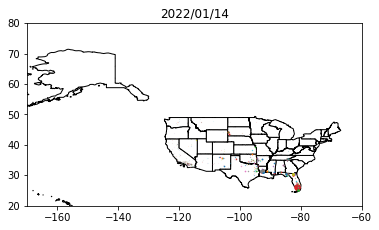

In [63]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import panel as pn 
# Plot the background  
df2 = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')
fig, ax = plt.subplots()
ax.set_xlim(-170, -60)
ax.set_ylim(20, 80)
df2.plot(ax=ax,color='white', edgecolor='black')
ax.set_aspect('equal')
# input
dpi = 600
frame = 500
database = df_changed0
def animate(i):
    # print(database.DailyAcres[i].astype(int) )
    plt.title(f"{database.CreatedOnDateTime_dt[i]}")
    ax.scatter(database.X[i], database.Y[i],
               marker='o',s =(database.DailyAcres[i]+1)/1000,cmap = "summer")
    # text.remove()
anim = animation.FuncAnimation(fig, animate,
                            frames = frame,
                            interval = 500)

anim.save('Wildfire_2022_Analysis2.mp4', writer = 'ffmpeg', fps = 5, dpi = dpi)

In [47]:
# fps 30 : 9.6 frame:10
# fps 5 : 9.6 frame:10

C:\Users\victo\AppData\Local\Temp\ipykernel_28372\1371578592.py:7: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')


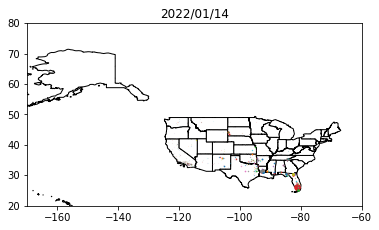

In [4]:
#location
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import panel as pn 
df = pd.read_csv(r'C:\Users\victo\anaconda3\1school\Wildfire\10.17\WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv')
df_changed0 = df.copy()
df_changed0['CreatedOnDateTime_dt'] = pd.to_datetime(df_changed0['CreatedOnDateTime_dt'])
df_changed0['CreatedOnDateTime_dt'] = df_changed0['CreatedOnDateTime_dt'].dt.strftime('%Y/%m/%d')
df_changed0['CreatedOnDateTime_dt']
df_changed0['DailyAcres'] = df_changed0['DailyAcres'].fillna(0)

df2 = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')
fig, ax = plt.subplots()
ax.set_xlim(-170, -60)
ax.set_ylim(20, 80)
df2.plot(ax=ax,color='white', edgecolor='black')
ax.set_aspect('equal')
# input
dpi = 600
frame = 1000
database = df_changed0
def animate(i):
    # print(database.DailyAcres[i].astype(int) )
    plt.title(f"{database.CreatedOnDateTime_dt[i]}")
    ax.scatter(database.X[i], database.Y[i],
               marker='o',s =(database.DailyAcres[i]+1)/1000,cmap = "summer")
    # text.remove()
anim = animation.FuncAnimation(fig, animate,
                            frames = frame,
                            interval = 500)

anim.save('Wildfire_2022_Analysis2.mp4', writer = 'ffmpeg', fps = 10, dpi = dpi)

In [53]:
from datetime import datetime
# 2022/10/11 15:45:31+00
df_time = df['CreatedOnDateTime_dt']
# df_time_object = [datetime.strptime(i, '%m/%d/%y %H:%M:%S') for i in df_time]
df_time_object = [datetime.strptime(i[:-3], '%Y/%m/%d %H:%M:%S') for i in df_time]
df_time_object[:5]



[datetime.datetime(2021, 11, 1, 12, 58, 2),
 datetime.datetime(2022, 1, 1, 11, 13, 42),
 datetime.datetime(2022, 1, 1, 15, 21, 58),
 datetime.datetime(2022, 1, 1, 16, 50, 50),
 datetime.datetime(2022, 1, 1, 18, 1, 19)]

In [54]:
mystr = '2022/10/11 15:45:31'
cool = datetime.strptime(mystr,'%Y/%m/%d %H:%M:%S')
cool1 = datetime.strftime(cool, '%Y/%m/%d')
cool1

'2022/10/11'

In [9]:
# Convert 2022/10/11 15:45:31+00 to 2022/10/11
# df['CreatedOnDateTime_dt'] = pd.to_datetime(df['CreatedOnDateTime_dt'], format='%Y/%m/%d %H:%M:%S').dt.strftime('%Y/%m/%d')
# df['DailyAcres'].dropna()#[['X','Y','CreatedOnDateTime_dt','DailyAcres']]
# df.head()


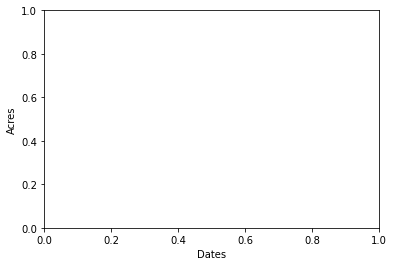

In [10]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
# plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
# plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('Acres')
plt.xlabel('Dates')

def buildmebarchart(i=int):
    p = plt.plot(df[:i].X, df[:i].Y) #note it only returns the dataset, up to the point i
    
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()


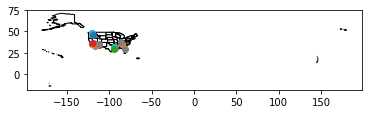

In [49]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
# creating a blank window
# for the animation

df2 = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

fig, ax = plt.subplots()
df2.plot(ax=ax,color='white', edgecolor='black')
ax.set_aspect('equal')

# fig = plt.figure(figsize=(15,15))
# axis = plt.axes(xlim =(-150, 150),
#                 ylim =(-150, 150))
 
# line, = ax.plot([], [], lw = 2)
# def init():
#     line.set_data([], [])
#     return line,
# xdata, ydata = [],[]
def animate(i):

    # x, y values to be plotted
    # x = df.X[i]
    # y = df.Y[i]
     
    # # appending values to the previously
    # # empty x and y data holders
    # xdata.append(x)
    # ydata.append(y)
    # line.set_data(xdata, ydata)
     
    # return line,

    # replot things
    ax.scatter(df.X[i], df.Y[i],
               marker='o')

    # # reformat things
    # ax.set_xlabel('world')
    # ax.set_ylabel('hello')
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            # init_func = init,
                            frames = 500,
                            interval = 500)
 
# saves the animation in our desktop
anim.save('Wildfire_2022_Analysis.mp4', writer = 'ffmpeg', fps = 5)

IndexError: list index out of range

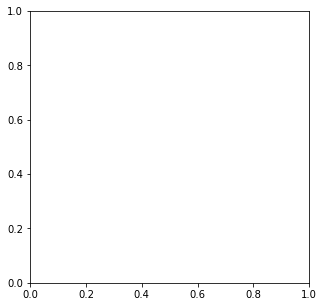

In [43]:
import itertools

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# set parameters
frames = 10
points = 20
np.random.seed(42)

# set how the graph will change each frame
sizes = itertools.cycle([10, 50, 150])
colors = np.random.rand(frames, points)
colormaps = itertools.cycle(['Purples', 'Blues', 'Greens', 'Oranges', 'Reds'])
markers = itertools.cycle(['o', 'v', '^', 's', 'p'])

# init the figure
fig, ax = plt.subplots(figsize=(5,5))

def update(i):
    # clear the axis each frame
    ax.clear()

    # replot things
    ax.scatter(data[:, 0], data[:, 1],
               s=next(sizes),
               c=colors[i, :],
               cmap=next(colormaps),
               marker=next(markers))

    # reformat things
    ax.set_xlabel('world')
    ax.set_ylabel('hello')

ani = animation.FuncAnimation(fig, update, frames=frames, interval=500)
ani.save('scatter.gif', writer='pillow')

AttributeError: 'GeoDataFrame' object has no attribute 'X'

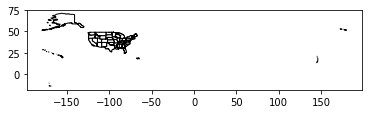

In [38]:
import geopandas as gpd
df2 = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

fig, ax = plt.subplots()
df2.plot(ax=ax,color='white', edgecolor='black')
ax.set_aspect('equal')

line, = axis.plot([], [], lw = 2)
def init():
    line.set_data([], [])
    return line,
xdata, ydata = [],[]

def animate(i):

    # x, y values to be plotted
    x = df.X[i]
    y = df.Y[i]
    
    # appending values to the previously
    # empty x and y data holders
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,

anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 500,
                            interval = 20,
                            blit = True)
 
# saves the animation in our desktop
anim.save('cool1.mp4', writer = 'ffmpeg', fps = 30)

-84.650604344

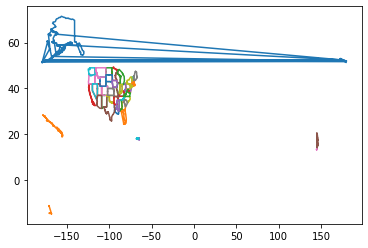

In [10]:

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [ ]:
from operator import ge
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

states = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = GeoDataFrame(df, geometry=geometry)   

states = states.to_crs("EPSG:4326")
a = gdf.plot(ax=states.plot(figsize=(10, 10)),marker='o', color='red', markersize=0.1)
a.set_title('2022 Wildfire Total')
a.set_xlim(-170, -60)
a.set_ylim(20, 80);
from operator import ge
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

states = gpd.read_file(r'C:\Users\victo\anaconda3\1school\Wildfire\tl_2017_us_state\tl_2017_us_state.shp')

geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = GeoDataFrame(df, geometry=geometry)   

states = states.to_crs("EPSG:4326")
a = gdf.plot(ax=states.plot(figsize=(10, 10)),marker='o', color='red', markersize=0.1)
a.set_title('2022 Wildfire Total')
a.set_xlim(-170, -60)
a.set_ylim(20, 80);

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
# axis = plt.axes(xlim =(-50, 50),
#                 ylim =(-50, 50))
 
line, = axis.plot([], [], lw = 2)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
xdata, ydata = [],[]
def animate(i):
     
    # x, y values to be plotted
    x = df.X
    y = df.Y
     
    # appending values to the previously
    # empty x and y data holders
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 500,
                            interval = 20,
                            blit = True)
 
# saves the animation in our desktop
anim.save('cool.mp4', writer = 'ffmpeg', fps = 30)
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
# axis = plt.axes(xlim =(-50, 50),
#                 ylim =(-50, 50))
 
line, = axis.plot([], [], lw = 2)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
xdata, ydata = [],[]
def animate(i):
     
    # x, y values to be plotted
    x = df.X
    y = df.Y
     
    # appending values to the previously
    # empty x and y data holders
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 500,
                            interval = 20,
                            blit = True)
 
# saves the animation in our desktop
anim.save('cool.mp4', writer = 'ffmpeg', fps = 30)